In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Step 1: Load the dataset
file_path = '/content/pca_result_95variance_11components.csv'  # Replace with the path to your dataset
data = pd.read_csv(file_path)

In [3]:
# Step 2: Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  3.270624  0.006484  0.931207  0.194497 -0.548759  0.164637 -1.213615   
1  3.555514 -0.304125  0.553428  0.477325 -0.244402 -0.612696 -0.606465   
2  3.053840  0.868990  0.951313  1.138860 -0.126610  0.597600 -2.242476   
3  3.536385 -0.631844  0.272864  0.404124 -0.457440 -0.989644  0.099945   
4  4.052061 -0.027087  1.362121 -0.401166 -0.727371  0.015877 -0.785044   

        PC8       PC9      PC10      PC11  LABEL  
0 -0.407367 -0.329040  0.088107 -0.600684      1  
1  0.037900 -0.070477 -0.151906  0.293247      1  
2 -0.033443 -0.434816  0.085929  0.200889      1  
3 -0.032871 -0.198402 -0.140390  0.452599      1  
4 -1.320280 -0.249229  0.179810 -1.045662      1  


In [5]:
# Step 3: Check for missing values
if data.isnull().sum().sum() > 0:
    print("Missing values detected. Filling with mean values...")
    data.fillna(data.mean(), inplace=True)
else:
    print("No missing values detected.")

# Step 4: Separate features and labels
if 'LABEL' in data.columns:
    features = data.drop(columns=['LABEL'])  # Dropping the label column
    labels = data['LABEL']
    print("Features and labels separated successfully.")
else:
    raise KeyError("'label' column not found in the dataset. Please ensure the dataset contains a 'label' column.")

No missing values detected.
Features and labels separated successfully.


In [6]:
# Step 5: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (325, 11)
Testing set size: (82, 11)


In [7]:
# Step 6: Initialize the SVM model
kernel_type = 'rbf'  # Options: 'linear', 'poly', 'rbf', 'sigmoid'
svm_model = SVC(kernel=kernel_type, random_state=42)
print(f"Initialized SVM with '{kernel_type}' kernel.")

Initialized SVM with 'rbf' kernel.


In [8]:
# Step 7: Train the SVM model
svm_model.fit(X_train, y_train)
print("SVM model trained successfully.")

SVM model trained successfully.


In [9]:
# Step 8: Make predictions on the test set
y_pred = svm_model.predict(X_test)
print("Predictions made on the test set.")

Predictions made on the test set.


In [10]:
# Step 9: Evaluate the SVM model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nSVM Model Accuracy: {accuracy:.2f}")


SVM Model Accuracy: 0.90


In [11]:
# Step 10: Display the classification report
print("\nClassification Report for SVM:")
print(classification_report(y_test, y_pred))


Classification Report for SVM:
              precision    recall  f1-score   support

           1       0.80      1.00      0.89         4
           2       1.00      1.00      1.00         7
           3       0.71      1.00      0.83         5
           4       1.00      1.00      1.00         8
           5       1.00      0.75      0.86         4
           6       1.00      0.75      0.86         4
           7       1.00      1.00      1.00         7
           8       0.75      0.75      0.75         4
           9       1.00      1.00      1.00         4
          10       1.00      1.00      1.00         3
          11       0.75      1.00      0.86         3
          12       1.00      0.80      0.89         5
          13       1.00      0.75      0.86         4
          14       1.00      1.00      1.00         4
          15       1.00      0.80      0.89         5
          16       0.50      1.00      0.67         2
          17       1.00      0.60      0.75      

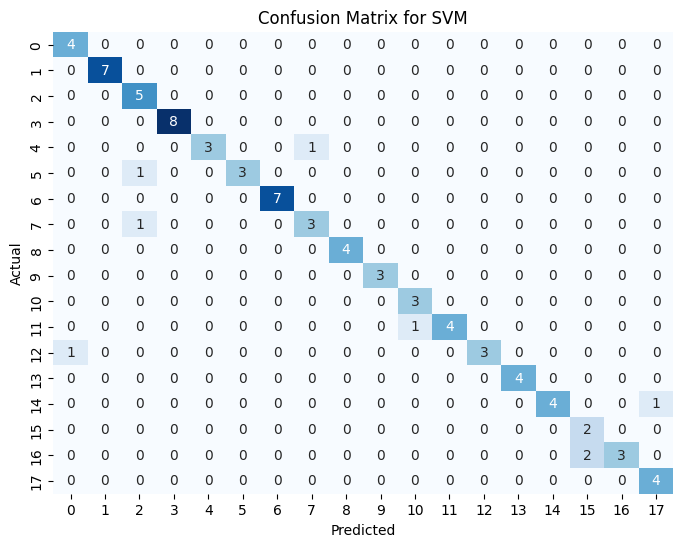

In [12]:
# Step 11: Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix for SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [14]:
# Step 12: Hyperparameter Tuning (Optional)
# Experiment with different kernel types and C values
kernel_options = ['linear', 'poly', 'rbf', 'sigmoid']
C_values = [0.1, 1, 10]
best_accuracy = 0
best_params = {}

print("\nTuning SVM hyperparameters...")
for kernel in kernel_options:
    for C in C_values:
        temp_model = SVC(kernel=kernel, C=C, random_state=42)
        temp_model.fit(X_train, y_train)
        temp_pred = temp_model.predict(X_test)
        temp_accuracy = accuracy_score(y_test, temp_pred)
        print(f"Kernel: {kernel}, C: {C}, Accuracy: {temp_accuracy:.2f}")
        if temp_accuracy > best_accuracy:
            best_accuracy = temp_accuracy
            best_params = {'kernel': kernel, 'C': C}

print(f"\nBest Parameters: {best_params}, Best Accuracy: {best_accuracy:.2f}")


Tuning SVM hyperparameters...
Kernel: linear, C: 0.1, Accuracy: 0.89
Kernel: linear, C: 1, Accuracy: 0.89
Kernel: linear, C: 10, Accuracy: 0.88
Kernel: poly, C: 0.1, Accuracy: 0.41
Kernel: poly, C: 1, Accuracy: 0.71
Kernel: poly, C: 10, Accuracy: 0.84
Kernel: rbf, C: 0.1, Accuracy: 0.45
Kernel: rbf, C: 1, Accuracy: 0.90
Kernel: rbf, C: 10, Accuracy: 0.90
Kernel: sigmoid, C: 0.1, Accuracy: 0.32
Kernel: sigmoid, C: 1, Accuracy: 0.80
Kernel: sigmoid, C: 10, Accuracy: 0.76

Best Parameters: {'kernel': 'rbf', 'C': 1}, Best Accuracy: 0.90
